In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Importing dataset

In [2]:
df_main1 = pd.read_csv("airline1.csv")
df_main2 = pd.read_csv("airline2.csv")
df_main3 = pd.read_csv("airline3.csv")
df_main4 = pd.read_csv("airline4.csv")
df_main5 = pd.read_csv("airline5.csv")
df_main6 = pd.read_csv("airline6.csv")

In [3]:
# Merging the data of the 6 months
df_main = df_main1.append([df_main2, df_main3, df_main4, df_main5, df_main6])
df_main.shape

(2580652, 18)

# Processing data

In [4]:
df_main.isna().sum()

MONTH                        0
DAY_OF_MONTH                 0
DAY_OF_WEEK                  0
OP_UNIQUE_CARRIER            0
OP_CARRIER                   0
ORIGIN_AIRPORT_ID            0
ORIGIN_CITY_NAME             0
DEST_AIRPORT_ID              0
DEP_DEL15               265738
ARR_DELAY_NEW           270650
ARR_DELAY_GROUP         270650
CANCELLED                    0
CARRIER_DELAY          2330581
WEATHER_DELAY          2330581
NAS_DELAY              2330581
SECURITY_DELAY         2330581
LATE_AIRCRAFT_DELAY    2330581
Unnamed: 17            2580652
dtype: int64

In [5]:
df_main = df_main.drop(columns=["Unnamed: 17"])

In [6]:
df_main = df_main.dropna()

In [7]:
df_main[df_main['CANCELLED'] == 1.0].count()

MONTH                  0
DAY_OF_MONTH           0
DAY_OF_WEEK            0
OP_UNIQUE_CARRIER      0
OP_CARRIER             0
ORIGIN_AIRPORT_ID      0
ORIGIN_CITY_NAME       0
DEST_AIRPORT_ID        0
DEP_DEL15              0
ARR_DELAY_NEW          0
ARR_DELAY_GROUP        0
CANCELLED              0
CARRIER_DELAY          0
WEATHER_DELAY          0
NAS_DELAY              0
SECURITY_DELAY         0
LATE_AIRCRAFT_DELAY    0
dtype: int64

In [8]:
df_main

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DEP_DEL15,ARR_DELAY_NEW,ARR_DELAY_GROUP,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,1,1,3,WN,WN,13891,"Ontario, CA",14771,1.0,68.0,4.0,0.0,8.0,0.0,27.0,0.0,33.0
7,1,1,3,WN,WN,13891,"Ontario, CA",14893,1.0,47.0,3.0,0.0,0.0,0.0,0.0,7.0,40.0
14,1,1,3,WN,WN,13931,"Norfolk, VA",10821,1.0,42.0,2.0,0.0,6.0,0.0,0.0,0.0,36.0
24,1,1,3,WN,WN,14027,"West Palm Beach/Palm Beach, FL",12391,1.0,179.0,11.0,0.0,179.0,0.0,0.0,0.0,0.0
29,1,1,3,WN,WN,14057,"Portland, OR",11292,1.0,28.0,1.0,0.0,28.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223637,6,25,4,MQ,MQ,11298,"Dallas/Fort Worth, TX",12992,1.0,62.0,4.0,0.0,30.0,0.0,1.0,0.0,31.0
223695,6,23,2,MQ,MQ,10792,"Buffalo, NY",11298,1.0,121.0,8.0,0.0,92.0,0.0,29.0,0.0,0.0
223723,6,21,7,MQ,MQ,11049,"College Station/Bryan, TX",11298,0.0,22.0,1.0,0.0,0.0,0.0,22.0,0.0,0.0
223725,6,23,2,MQ,MQ,11049,"College Station/Bryan, TX",11298,1.0,37.0,2.0,0.0,0.0,26.0,11.0,0.0,0.0


In [9]:
df_model = df_main.drop(columns=['CANCELLED', 'ORIGIN_CITY_NAME', 'OP_CARRIER'])

The 3 columns are no longer necessary and thus are dropped

In [10]:
df_model['SECURITY_DELAY_BIN'] = [1.0 if x >= 15.0 else 0.0 for x in df_model['SECURITY_DELAY']]
df_model['WEATHER_DELAY_BIN'] = [1.0 if x >= 15.0 else 0.0 for x in df_model['WEATHER_DELAY']]
df_model['NAS_DELAY_BIN'] = [1.0 if x >= 15.0 else 0.0 for x in df_model['NAS_DELAY']]
df_model['CARRIER_DELAY_BIN'] = [1.0 if x >= 15.0 else 0.0 for x in df_model['CARRIER_DELAY']]
df_model['LATE_AIRCRAFT_DELAY_BIN'] = [1.0 if x >= 15.0 else 0.0 for x in df_model['LATE_AIRCRAFT_DELAY']]
df_model['ARR_DELAY_GROUP_BIN'] = [1.0 if x >= 2.0 else 0.0 for x in df_model['ARR_DELAY_GROUP']]
df_model = df_model.drop(columns=['SECURITY_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'CARRIER_DELAY', 'LATE_AIRCRAFT_DELAY', 'ARR_DELAY_GROUP', 'ARR_DELAY_NEW'])

Classifying numeric data into groups

Assumptions made : for types of delay, they are considered significant if they are more than 15 minutes


Delay groups are only taken from value 2 and above (30 minutes or more) and values below 2 are treated as "not late" (0)

In [11]:
df_model.nunique()

MONTH                        5
DAY_OF_MONTH                31
DAY_OF_WEEK                  7
OP_UNIQUE_CARRIER           17
ORIGIN_AIRPORT_ID          360
DEST_AIRPORT_ID            361
DEP_DEL15                    2
SECURITY_DELAY_BIN           2
WEATHER_DELAY_BIN            2
NAS_DELAY_BIN                2
CARRIER_DELAY_BIN            2
LATE_AIRCRAFT_DELAY_BIN      2
ARR_DELAY_GROUP_BIN          2
dtype: int64

Most columns are binary, except for columns such as AIRPORT_ID

In [12]:
from sklearn import tree, preprocessing, metrics, model_selection, linear_model
df_model_features = pd.get_dummies(df_model.drop(columns=['ARR_DELAY_GROUP_BIN']))
df_model_target = df_model['ARR_DELAY_GROUP_BIN']


trainX, testX, trainY, testY = model_selection.train_test_split(np.array(df_model_features), np.array(df_model_target), test_size=0.2)

In [13]:
enc = preprocessing.OneHotEncoder(handle_unknown='ignore')
enc.fit(df_model_features)
trainX_enc = enc.transform(trainX)
testX_enc = enc.transform(testX)
le = preprocessing.LabelEncoder()
le.fit(df_model_target)
trainY_enc = le.transform(trainY)
testY_enc = le.transform(testY)

In [14]:
from sklearn.tree import DecisionTreeClassifier
decisionTree = DecisionTreeClassifier(random_state=0, criterion='entropy')
decisionTree.fit(trainX, trainY)
predY = decisionTree.predict(testX)
print("Decision Tree without depth limit: ")
print(metrics.classification_report(testY, predY))
print("Depth of tree: {}".format(decisionTree.get_depth()))

Decision Tree without depth limit: 
              precision    recall  f1-score   support

         0.0       0.77      0.79      0.78     20297
         1.0       0.85      0.84      0.84     29718

    accuracy                           0.82     50015
   macro avg       0.81      0.81      0.81     50015
weighted avg       0.82      0.82      0.82     50015

Depth of tree: 57


In [15]:
decisionTree = DecisionTreeClassifier(random_state=0, max_depth=20, criterion='entropy')
decisionTree.fit(trainX, trainY)
predY = decisionTree.predict(testX)
print("Decision Tree with depth limit: ")
print(metrics.classification_report(testY, predY))

Decision Tree with depth limit: 
              precision    recall  f1-score   support

         0.0       0.75      0.60      0.67     20297
         1.0       0.76      0.87      0.81     29718

    accuracy                           0.76     50015
   macro avg       0.76      0.73      0.74     50015
weighted avg       0.76      0.76      0.75     50015



In [16]:
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier(random_state=0, criterion='entropy')
randomForest.fit(trainX, trainY)
predY = randomForest.predict(testX)
print("Random Forest: ")
print(metrics.classification_report(testY, predY))

Random Forest: 
              precision    recall  f1-score   support

         0.0       0.81      0.77      0.79     20297
         1.0       0.85      0.88      0.86     29718

    accuracy                           0.84     50015
   macro avg       0.83      0.83      0.83     50015
weighted avg       0.83      0.84      0.83     50015



In [17]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(random_state=0)
logReg.fit(trainX, trainY)
predY = logReg.predict(testX)
print("Logistic Regression: ")
print(metrics.classification_report(testY, predY))

Logistic Regression: 
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     20297
         1.0       0.59      1.00      0.75     29718

    accuracy                           0.59     50015
   macro avg       0.30      0.50      0.37     50015
weighted avg       0.35      0.59      0.44     50015



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

It seems that the model is confused by features and all the predictions made are 1.0, thus leading to 0 in precision, recall and f1-score for target 0.

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=0)
gbc.fit(trainX, trainY)
predY = gbc.predict(testX)
print("Gradient Boosting: ")
print(metrics.classification_report(testY, predY))

Gradient Boosting: 
              precision    recall  f1-score   support

         0.0       0.76      0.54      0.63     20297
         1.0       0.74      0.88      0.81     29718

    accuracy                           0.75     50015
   macro avg       0.75      0.71      0.72     50015
weighted avg       0.75      0.75      0.74     50015



In [19]:
# from sklearn import svm
# svc = svm.SVC(random_state=0)
# svc.fit(trainX_enc, trainY_enc)
# predY = svc.predict(testX_enc)
# print("SVM: ")
# print(metrics.classification_report(testY, predY))

Text(0, 0.5, 'cumulative explained variance')

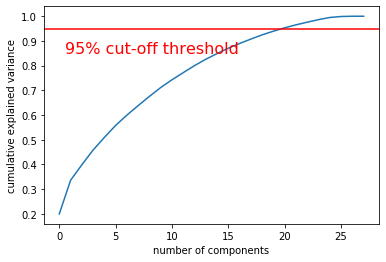

In [20]:
# Scale the data
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(df_model_features)

pca = PCA().fit(data_rescaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [21]:
# Transform the data with PCA
pca = PCA(n_components=20)
features_pca = pca.fit_transform(df_model_features)

In [22]:
from sklearn.feature_selection import SelectKBest, chi2
features_kbest = SelectKBest(chi2, k=20).fit_transform(df_model_features, df_model_target)

In [23]:
# from sklearn.feature_selection import RFE
# from sklearn.svm import SVR
# estimator = SVR(kernel="linear")
# selector = RFE(estimator, n_features_to_select=5, step=1)
# selector = selector.fit(df_model_features, df_model_target)
# selector.support_
# selector.ranking_

In [24]:
# from sklearn import svm
# from sklearn.model_selection import GridSearchCV
# svc = svm.SVC()
# parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
# clf = GridSearchCV(svc, parameters)
# clf.fit(df_model_features, df_model_target)
# sorted(clf.cv_results_.keys())

In [ ]:
trainX_pca, testX_pca, trainY_pca, testY_pca = model_selection.train_test_split(np.array(features_pca), np.array(df_model_target), test_size=0.2)

decisionTree2 = DecisionTreeClassifier(random_state=0, max_depth=20, criterion='entropy')
decisionTree2.fit(trainX_pca, trainY_pca)
predY_pca = decisionTree2.predict(testX_pca)
print("Decision Tree with PCA: ")
print(metrics.classification_report(testY_pca, predY_pca))